
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]


In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

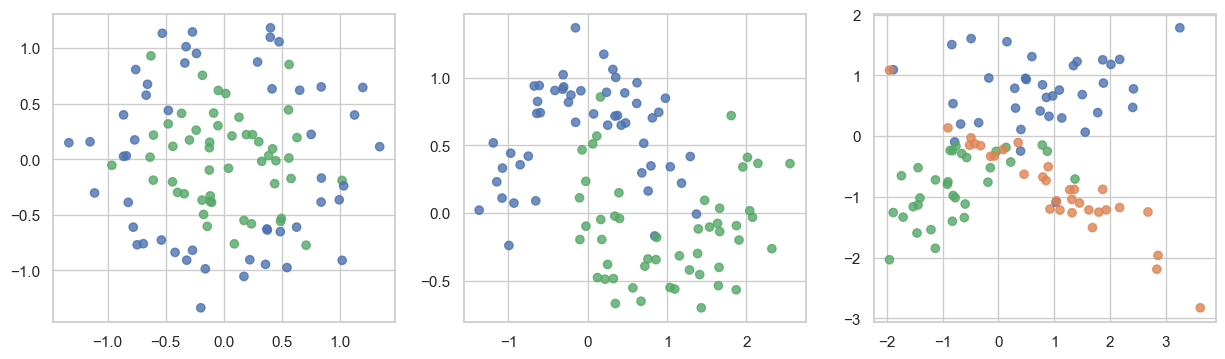

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

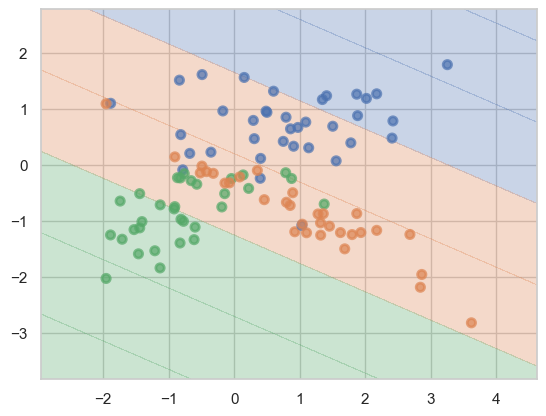

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
random_state = 777

In [8]:
from sklearn.model_selection import train_test_split

def get_data(n: int, random_state = 777):
    X, y = datasets[n-1]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=random_state)
    return  X_train, X_test, y_train, y_test

In [9]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
from sklearn.tree import DecisionTreeClassifier

X_train_1, X_test_1, y_train_1, y_test_1 = get_data(1)
clf_1 = DecisionTreeClassifier(random_state=random_state)

clf_1.fit(X_train_1, y_train_1)

X_train_2, X_test_2, y_train_2, y_test_2 = get_data(2)
clf_2 = DecisionTreeClassifier(random_state=random_state)

clf_2.fit(X_train_2, y_train_2)

X_train_3, X_test_3, y_train_3, y_test_3 = get_data(3)
clf_3 = DecisionTreeClassifier(random_state=random_state, )

clf_3.fit(X_train_3, y_train_3)

DecisionTreeClassifier(random_state=777)

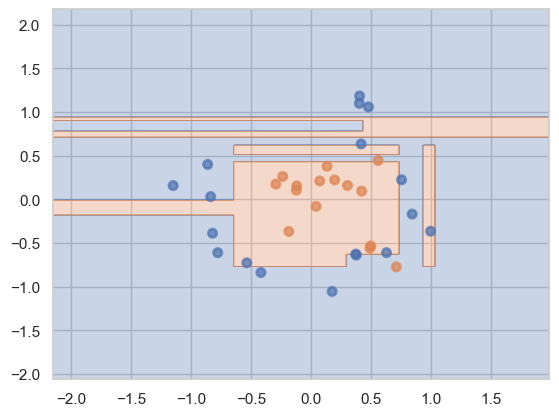

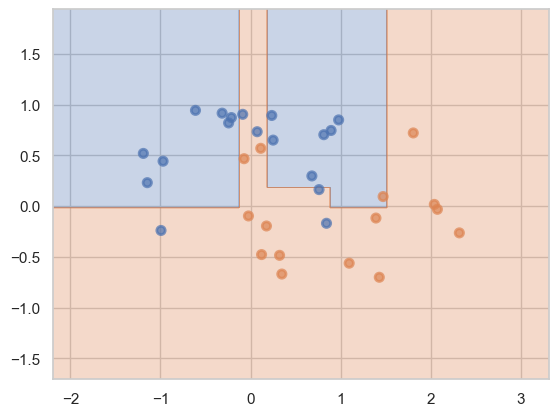

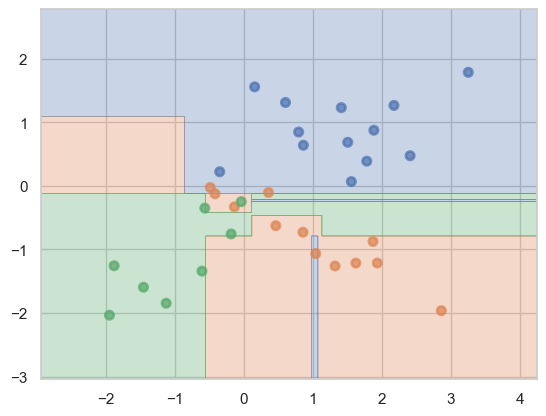

In [10]:
plot_surface(clf_1, X_test_1, y_test_1)
plt.show()
plot_surface(clf_2, X_test_2, y_test_2)
plt.show()
plot_surface(clf_3, X_test_3, y_test_3)

In [11]:
def get_acc(x, clf):
    return clf.predict(x)

In [12]:
from sklearn.metrics import accuracy_score
acc_list = [
    accuracy_score(y_test_1, get_acc(X_test_1, clf_1)),
    accuracy_score(y_test_2, get_acc(X_test_2, clf_2)),
    accuracy_score(y_test_3, get_acc(X_test_3, clf_3))
]
acc_list

[0.8181818181818182, 0.8181818181818182, 0.8787878787878788]

__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:результаты хорошие, потому что данные хорошие. Ты смотришь на них и сразу видишь как можно разделить. Ну по разделени на классы мы видим следы переобучения

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


=== Dataset 1 ===
Best params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'splitter': 'best'}
Train accuracy: 0.97
Test accuracy: 0.82


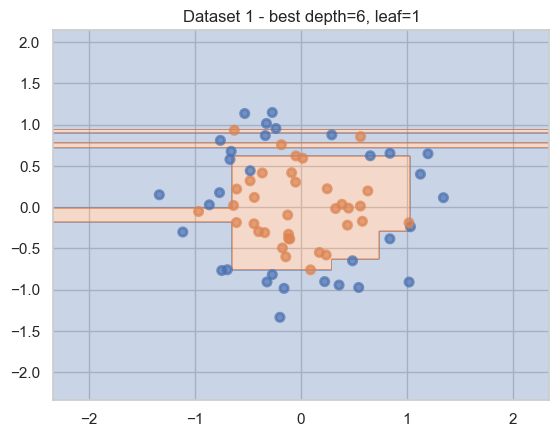


=== Dataset 2 ===
Best params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'splitter': 'best'}
Train accuracy: 0.93
Test accuracy: 0.85


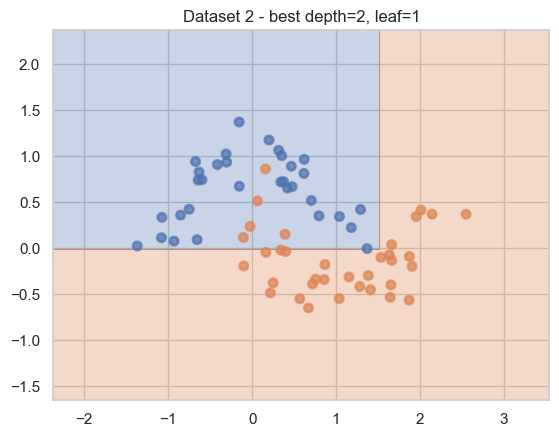


=== Dataset 3 ===
Best params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10, 'splitter': 'best'}
Train accuracy: 0.85
Test accuracy: 0.88


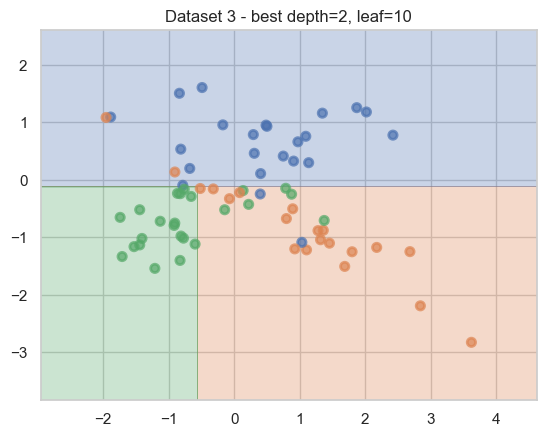

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 4, 6, 8, 10,],
    'min_samples_leaf': [1, 5, 10, 15,],
    'criterion': ['gini', 'entropy', 'log_loss',],
    'splitter': ['best', 'random',]
}

for i in range(1, 4):
    X_train, X_test, y_train, y_test = get_data(i)

    print(f"\n=== Dataset {i} ===")

    clf = DecisionTreeClassifier(random_state=random_state)

    grid_search = GridSearchCV(
        estimator=clf,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    print(f"Best params: {grid_search.best_params_}")
    print(f"Train accuracy: {accuracy_score(y_train, best_clf.predict(X_train)):.2f}")
    print(f"Test accuracy: {accuracy_score(y_test, best_clf.predict(X_test)):.2f}")

    plot_surface(best_clf, X_train, y_train)
    plt.title(f"Dataset {i} - best depth={grid_search.best_params_['max_depth']}, "
              f"leaf={grid_search.best_params_['min_samples_leaf']}")
    plt.show()


__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

У нас разные изменения потому что, данные разные => к каждому свой подход

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

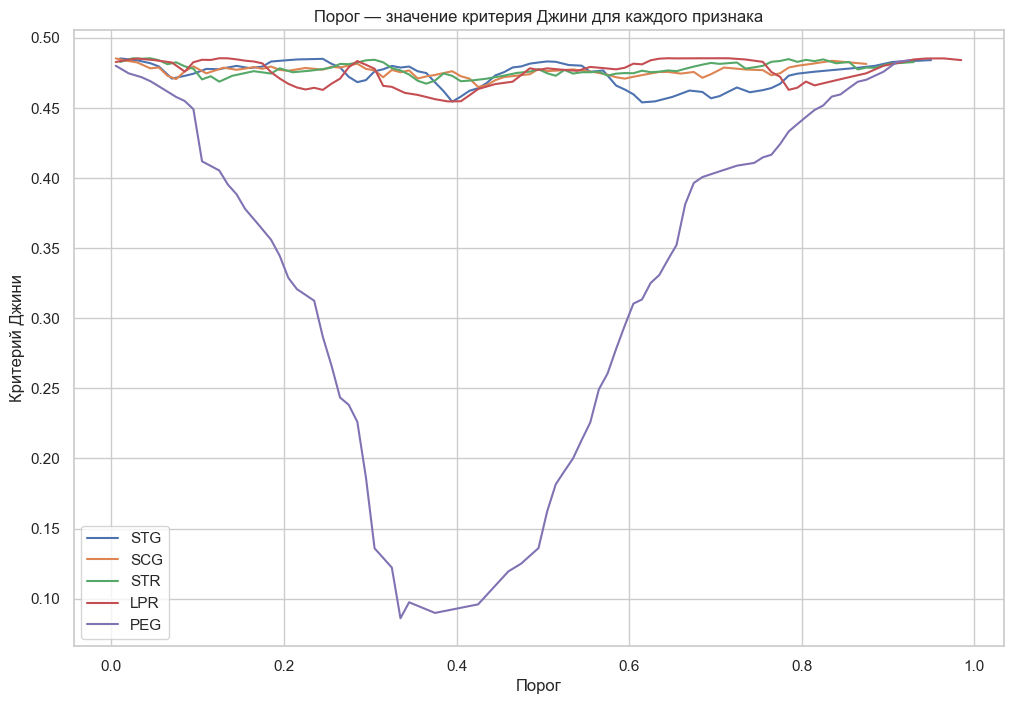

In [14]:
from tree_code import find_best_split

df = pd.read_csv("students.csv")
X = df.drop(columns="UNS").values
y = df["UNS"].values
feature_names = df.columns[:-1]

plt.figure(figsize=(12, 8))

for i in range(X.shape[1]):
    thresholds, ginis, _, _ = find_best_split(X[:, i], y)
    plt.plot(thresholds, ginis, label=feature_names[i])

plt.title("Порог — значение критерия Джини для каждого признака")
plt.xlabel("Порог")
plt.ylabel("Критерий Джини")
plt.legend()
plt.grid(True)
plt.show()


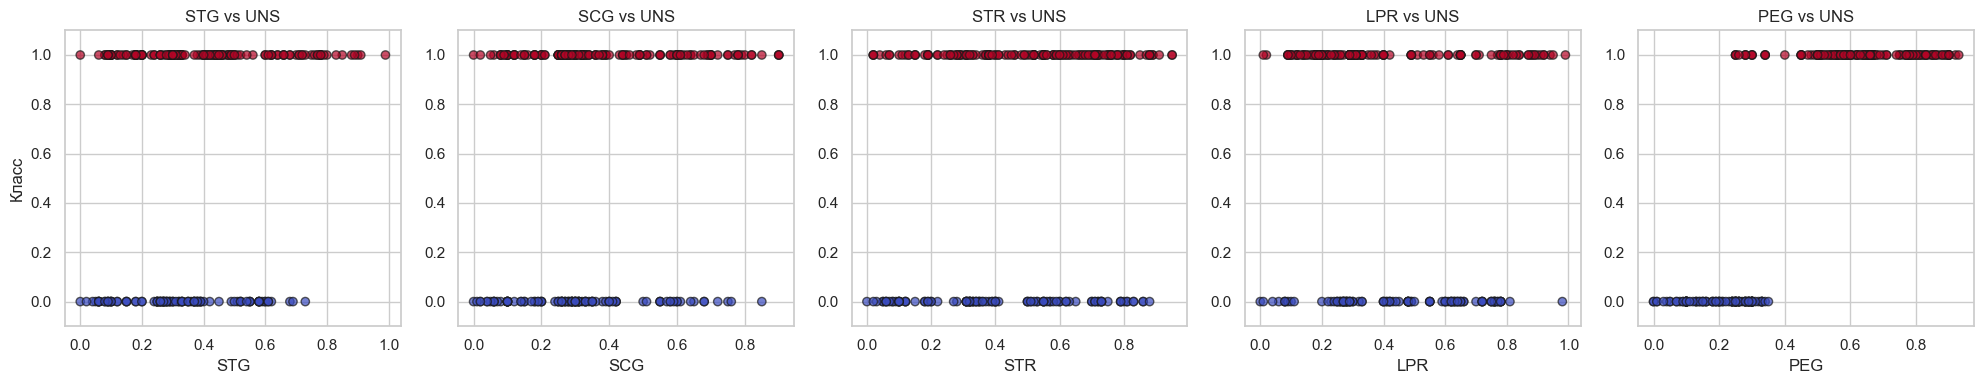

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(X.shape[1]):
    axes[i].scatter(X[:, i], y, c=y, cmap="coolwarm", edgecolor="k", alpha=0.7)
    axes[i].set_title(f"{feature_names[i]} vs UNS")
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_ylim(-0.1, 1.1)
    if i == 0:
        axes[i].set_ylabel("Класс")

plt.tight_layout()
plt.show()


__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:

Признак, по которому стоит разделить выборку на два поддерева — это PEG

Да, это хорошо видно

Кривая Джини для «хороших» признаков выглядит как глубокая вогнутая яма с чётко выраженным минимумом. Это указывает на то, что существует конкретный порог. Напротив, для «плохих» признаков кривая плоская.


__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




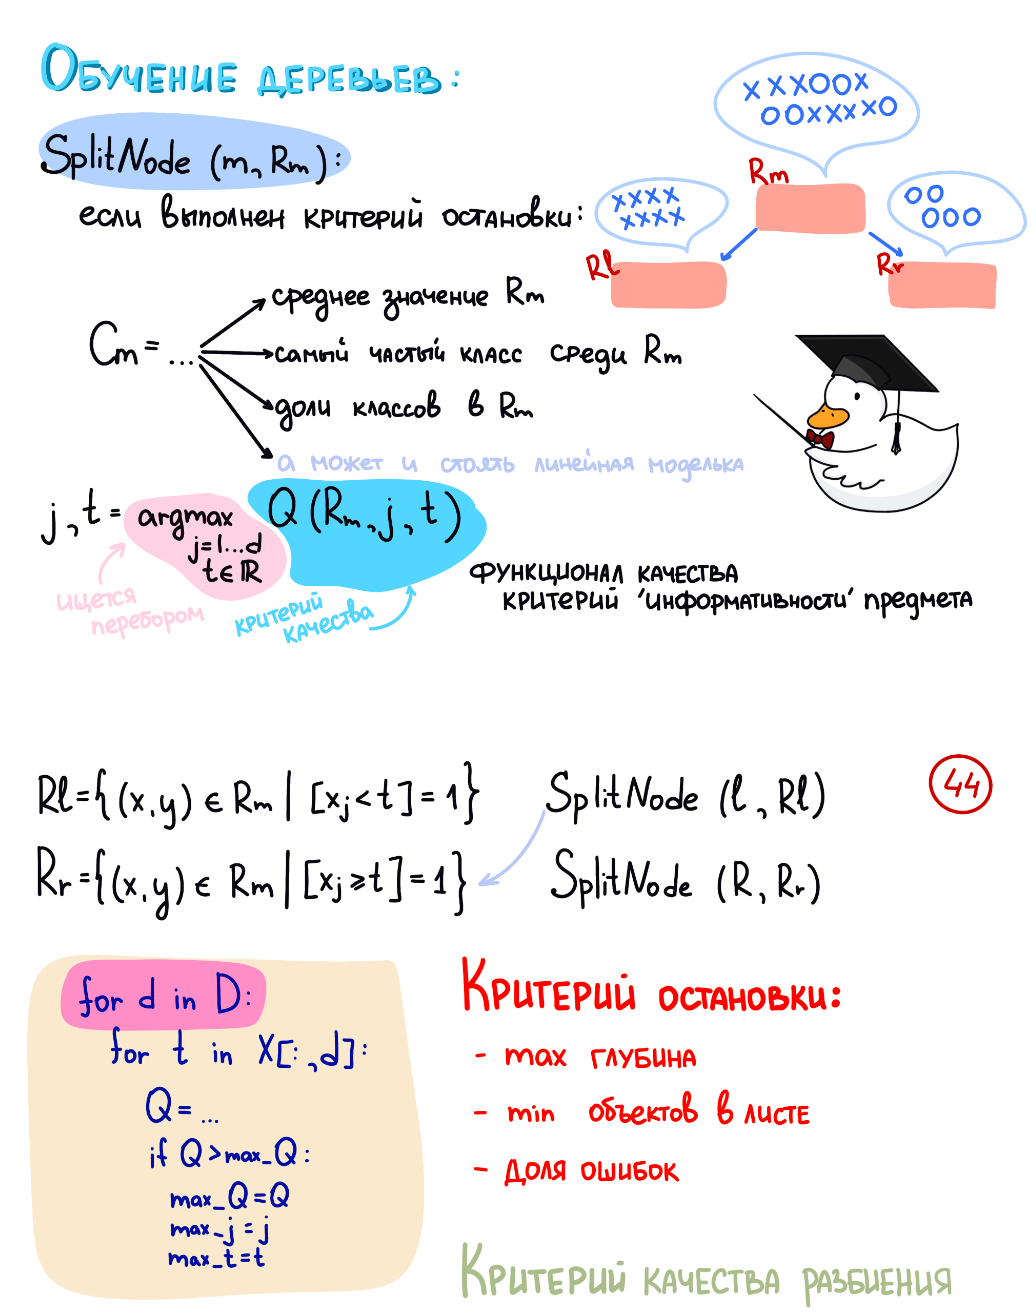

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tree_code import DecisionTree

DATA_PATH = "agaricus-lepiota.data"
MAX_DEPTH = 5
TEST_SIZE = 0.7

columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv(DATA_PATH, header=None, names=columns)

y = (df["class"] == 'p').astype(int).values  # p -> 1 (ядовитый), e -> 0 (съедобный)

X_raw = df.drop("class", axis=1)
X = np.zeros_like(X_raw, dtype=int)

encoders = []

for i, col in enumerate(X_raw.columns):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X_raw[col])
    encoders.append(le)

feature_types = ["categorical"] * X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=random_state, stratify=y
)

tree = DecisionTree(feature_types=feature_types, max_depth=MAX_DEPTH)
tree.fit(X_train, y_train)

preds = tree.predict(X_test)
acc = accuracy_score(y_test, preds)

print(f"Точность модели на тесте: {acc:.4f}")


Точность модели на тесте: 0.9989


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.base import BaseEstimator


# --- Утилита для кодирования признаков ---
def encode_features(X):
    for i in range(X.shape[1]):
        le = LabelEncoder()
        X[:, i] = le.fit_transform(X[:, i])
    return X.astype(int)


# --- Универсальный загрузчик ---
def load_dataset(filepath, columns, label_column, label_fn):
    df = pd.read_csv(filepath, header=None, names=columns)
    df.replace('?', np.nan, inplace=True)
    df.dropna(inplace=True)
    X = encode_features(df.drop(label_column, axis=1).values)
    y = df[label_column].apply(label_fn).values
    return X, y


# --- Загрузчики датасетов ---
load_mushrooms = lambda: load_dataset(
    "agaricus-lepiota.data",
    ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
     'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
     'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
     'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
     'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'],
    "class",
    lambda x: 0 if x == "e" else 1
)

load_tic_tac_toe = lambda: load_dataset(
    "tic-tac-toe-endgame.csv",
    ['top-left', 'top-middle', 'top-right', 'middle-left', 'middle-middle', 'middle-right',
     'bottom-left', 'bottom-middle', 'bottom-right', 'Class'],
    "Class",
    lambda x: 1 if x == "positive" else 0
)

load_car = lambda: load_dataset(
    "car.data",
    ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'],
    "class",
    lambda x: 0 if x in ["unacc", "acc"] else 1
)

load_nursery = lambda: load_dataset(
    "nursery.data",
    ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class'],
    "class",
    lambda x: 0 if x in ['not_recom', 'recommend'] else 1
)


# --- Оценка модели ---
def evaluate_model(model, X, y):
    scorer = make_scorer(accuracy_score)
    try:
        scores = cross_val_score(model, X, y, cv=10, scoring=scorer)
        return scores.mean()
    except Exception as e:
        print(f"Ошибка при оценке модели: {e}")
        return np.nan


# --- Реализация дерева решений ---
def find_best_split(feature_vector, target_vector):
    assert len(feature_vector) == len(target_vector)
    sorted_indices = np.argsort(feature_vector)
    feature_sorted = feature_vector[sorted_indices]
    target_sorted = target_vector[sorted_indices]
    diff_indices = np.where(feature_sorted[:-1] != feature_sorted[1:])[0]
    if len(diff_indices) == 0:
        return None, None, None, -np.inf
    thresholds = (feature_sorted[diff_indices] + feature_sorted[diff_indices + 1]) / 2
    ginis = []
    for threshold in thresholds:
        left_mask = feature_sorted < threshold
        right_mask = ~left_mask
        n_left = np.sum(left_mask)
        n_right = np.sum(right_mask)
        n_total = len(target_sorted)
        if n_left == 0 or n_right == 0:
            ginis.append(-np.inf)
            continue
        p1_left = np.mean(target_sorted[left_mask])
        h_left = 1 - p1_left ** 2 - (1 - p1_left) ** 2
        p1_right = np.mean(target_sorted[right_mask])
        h_right = 1 - p1_right ** 2 - (1 - p1_right) ** 2
        gini = -(n_left / n_total) * h_left - (n_right / n_total) * h_right
        ginis.append(gini)
    best_idx = np.argmax(ginis)
    return thresholds, ginis, thresholds[best_idx], ginis[best_idx]


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=2):
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._tree = {}

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def _fit_node(self, X, y, node, depth=0):
        if len(y) == 0 or len(set(y)) == 1 or \
           (self._max_depth is not None and depth >= self._max_depth) or \
           len(X) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = int(Counter(y).most_common(1)[0][0]) if len(y) > 0 else 0
            return

        best_feature, best_threshold, best_gini = None, None, -np.inf
        best_categories, best_split = None, None

        for i in range(X.shape[1]):
            f_type = self._feature_types[i]
            column = X[:, i]
            if f_type == "real":
                feature_vector = column.astype(float)
            else:
                counts = Counter(column)
                pos_counts = Counter(column[y == 1])
                ratios = {k: pos_counts.get(k, 0) / counts[k] for k in counts}
                sorted_cats = sorted(ratios, key=ratios.get)
                cat_idx = {cat: idx for idx, cat in enumerate(sorted_cats)}
                feature_vector = np.vectorize(cat_idx.get)(column)

            if len(np.unique(feature_vector)) <= 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, y)
            if gini is None:
                continue

            split = feature_vector < threshold if f_type == "real" else np.isin(feature_vector, np.arange(threshold))

            if gini > best_gini:
                best_feature, best_threshold = i, threshold
                best_split, best_gini = split, gini
                best_categories = [cat for cat, idx in cat_idx.items() if idx < threshold] if f_type == "categorical" else None

        if best_feature is None or len(X[best_split]) < self._min_samples_split or len(X[~best_split]) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = int(Counter(y).most_common(1)[0][0])
            return

        node.update({
            "type": "nonterminal",
            "feature": best_feature,
            "threshold": best_threshold,
            "categories": best_categories
        })
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(X[best_split], y[best_split], node["left_child"], depth + 1)
        self._fit_node(X[~best_split], y[~best_split], node["right_child"], depth + 1)

    def _predict_one(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        feature = node["feature"]
        if self._feature_types[feature] == "real":
            return self._predict_one(x, node["left_child"] if float(x[feature]) < node["threshold"] else node["right_child"])
        return self._predict_one(x, node["left_child"] if x[feature] in node["categories"] else node["right_child"])

    def predict(self, X):
        return np.array([self._predict_one(x, self._tree) for x in X])


class CustomDecisionTreeWrapper(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=2):
        self.tree = DecisionTree(feature_types, max_depth, min_samples_split)

    def fit(self, X, y):
        self.tree.fit(X, y)
        return self

    def predict(self, X):
        return self.tree.predict(X)

    def get_params(self, deep=True):
        return {
            "feature_types": self.tree._feature_types,
            "max_depth": self.tree._max_depth,
            "min_samples_split": self.tree._min_samples_split
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self.tree, f"_{param}", value)
        return self


datasets = {
    "Mushrooms": load_mushrooms(),
    "Tic-Tac-Toe": load_tic_tac_toe(),
    "Car Evaluation": load_car(),
    "Nursery": load_nursery()
}

results = []
for name, (X, y) in datasets.items():
    print(f"\nProcessing dataset: {name}")
    n_features = X.shape[1]

    models = {
        "Custom Tree (Real)": CustomDecisionTreeWrapper(["real"] * n_features),
        "Custom Tree (Categorical)": CustomDecisionTreeWrapper(["categorical"] * n_features),
        "Custom Tree + OneHot": Pipeline([
            ('preprocessor', ColumnTransformer([
                ('onehot', OneHotEncoder(sparse_output=False), list(range(n_features)))
            ])),
            ('tree', DecisionTreeClassifier())
        ]),
        "Sklearn Tree": DecisionTreeClassifier()
    }

    result = {"Dataset": name}
    for model_name, model in models.items():
        result[model_name] = evaluate_model(model, X, y)
    results.append(result)

df = pd.DataFrame(results).set_index("Dataset")

custom_df = df[["Custom Tree (Real)", "Custom Tree (Categorical)"]]
other_df = df[["Custom Tree + OneHot", "Sklearn Tree"]]

from tabulate import tabulate

df_rounded = df.copy().applymap(lambda x: f"{x:.4f}" if pd.notnull(x) else "  NaN")

df_rounded.reset_index(inplace=True)

print("\nAccuracy Results:\n")
print(tabulate(df_rounded, headers='keys', tablefmt='github', showindex=False))




Processing dataset: Mushrooms

Processing dataset: Tic-Tac-Toe

Processing dataset: Car Evaluation

Processing dataset: Nursery

Accuracy Results:

| Dataset        |   Custom Tree (Real) |   Custom Tree (Categorical) | Custom Tree + OneHot   |   Sklearn Tree |
|----------------|----------------------|-----------------------------|------------------------|----------------|
| Mushrooms      |               0.9851 |                      0.9915 | NaN                    |         0.9872 |
| Tic-Tac-Toe    |               0.4783 |                      0.5898 | NaN                    |         0.7729 |
| Car Evaluation |               0.9427 |                      0.9641 | 0.8185                 |         0.9433 |
| Nursery        |               0.9996 |                      0.9998 | 0.9997                 |         0.9997 |


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


Алгоритмы ранжируются по-разному на разных наборах данных, потому что каждый из них по-разному обрабатывает признаки и структуру данных. Это не случайная компонента, а закономерность, связанная с типом признаков (категориальные или числовые), количеством классов, распределением меток и способами обработки категорий.

Например, Custom Tree (Real) хуже работает на данных с категориальными признаками, потому что он обращается с ними как с числами — это не отражает реальную природу категорий. Custom Tree (Categorical) учитывает категориальную природу признаков, поэтому чаще даёт лучшие результаты. Sklearn Tree показывает стабильные результаты, потому что он имеет встроенную поддержку категориальных признаков через бинарные сплиты и автоматически оптимизирует разбиения.

Модель с OneHot работает хорошо только тогда, когда данные корректно представлены — если использовать закодированные int-значения вместо исходных строк, она ломается, что и приводило к NaN.

Чтобы повлиять на это и улучшить работу моделей, можно:

* использовать правильное представление категориальных признаков (например, OneHot или порядковое кодирование);
* регуляризация (max\_depth, min\_samples\_split);
* ансамбли.


# Как дела?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
## Так себе(